        Data Science: A Programming Approach
        Mahyar S Vaghefi
        University of Texas Arlington
        
        This document can only be used for class studies. 
        You are not allowed to share it in any public platform.

<h1 align='center' style="color: blue;">Text Analysis - Part II</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1. Term Frequency Visualization

We already have used wordcloud for presentation of word frequency in textual data. However, we also need to use a more scientific approach for our presentation. In this section, you will learn how to present token frequency using yellowbrick package

In [10]:
!pip install yellowbrick

    100% |████████████████████████████████| 286kB 3.3MB/s ta 0:00:01


Let's use wikipedia API for data collection.

In [5]:
!pip install wikipedia

  Running setup.py bdist_wheel for wikipedia ... done
  Stored in directory: /Users/sravaniranga/Library/Caches/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [6]:
import wikipedia
# Search for a keyword
wiki_obj = wikipedia.page("Barack Obama")
# Get the content of Wikipedia 
wiki_con = wiki_obj.content
wiki_con

'Barack Hussein Obama II ( (listen); born August 4, 1961) is an American attorney and politician who served as the 44th president of the United States from 2009 to 2017. A member of the Democratic Party, he was the first African American to be elected to the presidency. He previously served as a U.S. senator from Illinois from 2005 to 2008.\nObama was born in Honolulu, Hawaii. After graduating from Columbia University in 1983, he worked as a community organizer in Chicago. In 1988, he enrolled in Harvard Law School, where he was the first black president of the Harvard Law Review. After graduating, he became a civil rights attorney and an academic, teaching constitutional law at the University of Chicago Law School from 1992 to 2004. He represented the 13th district for three terms in the Illinois Senate from 1997 to 2004, when he ran for the U.S. Senate. He received national attention in 2004 with his March primary win, his well-received July Democratic National Convention keynote add

<b>Note</b>: You can also use the <b style="color:red">url</b> to get the link for the wikipedia page. 

In [7]:
wiki_obj.url

'https://en.wikipedia.org/wiki/Barack_Obama'

<b>Example:</b> Collect wikipedia info for more than one person.

In [8]:
names = ['Barack Obama', 'Michele Obama', 'George w Bush', 'Laura Bush']
contents = [wikipedia.page(name).content for name in names]
df = pd.DataFrame({'name':names, 'content':contents})
df

,name,content
0,Barack Obama,Barack Hussein Obama II ( (listen); born Augus...
1,Michele Obama,Michelle LaVaughn Robinson Obama (born January...
2,George w Bush,"George Walker Bush (born July 6, 1946) is an A..."
3,Laura Bush,"Laura Lane Welch Bush (born November 4, 1946) ..."


Now, let's visualize the content.

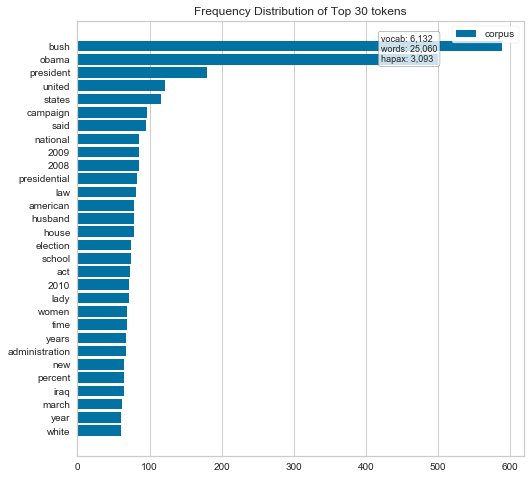

In [11]:
from yellowbrick.text.freqdist import FreqDistVisualizer 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Find the Document Term Frequency Matrix 
vect = CountVectorizer(stop_words='english')
X = vect.fit_transform(df.content)

# Get all features (tokens)
features = vect.get_feature_names()

# Use yellowbrick package for visualization of top 30 tokens
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(X)
visualizer.poof()

## 2. Topic Modeling and Document Clustering

Topic modeling is one of the popular techniques in text analysis. This task is similar to the process of clustering in numerical data analysis. Often, when people talk about topic modeling, they refer to one particular decomposition method called <b>Latent Dirichlet Allocation (LDA)</b>

In LDA, each document may be viewed as a mixture of various topics where each document is considered to have a set of topics that are assigned to it via LDA. This is identical to probabilistic latent semantic analysis (pLSA), except that in LDA the topic distribution is assumed to have a sparse Dirichlet prior. The sparse Dirichlet priors encode the intuition that documents cover only a small set of topics and that topics use only a small set of words frequently. In practice, this results in a better disambiguation of words and a more precise assignment of documents to topics. LDA is a generalization of the pLSA model, which is equivalent to LDA under a uniform Dirichlet prior distribution. (<b>Source:Wikipedia</b>)

Let's use wine-reviews dataset again.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer 
df = pd.read_csv("winemag-data-130k-v2.csv",index_col=0, nrows=20000)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


<b>Note:</b> Topic mining process can take large amount of time. In order to make the process faster, you can use the following attributes in CountVectorizer to reduce the sime of Document Term Frequency Matrix:
<ul>
    <li><b>max_features:</b> Build a vocabulary that only consider the top max_features ordered by term frequency across the corpus</li>
    <li><b>max_df:</b> When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold.</li>

In [15]:
# Let's create the Document Term Frequency Matrix
vect = CountVectorizer(max_features=10000, max_df=.10, 
                       stop_words="english")
X = vect.fit_transform(df.description)

<b>Note:</b> You can use <b style="color:blue">LatentDirichletAllocation( )</b> function for LDA topic mining.

In [16]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

<b>Note:</b> document_topics variable shows the probability that each document belongs to one of the captured topics. The shape of document_topics is (n_documents, n_topic)

In [17]:
document_topics.shape

(20000, 5)

<b>Note:</b> You can use <b style="color:red">components_</b> attribute to get weights of each token in different captured topics. The output of components_ attribute is a numpy array with a shape of (n_topics, n_tokens).

In [18]:
# let's see the result
lda.components_

array([[ 0.20102855,  0.20000183,  0.20000223, ...,  0.20014892,
         0.20524711,  2.19760923],
       [ 0.20159495,  0.20152087,  0.20263409, ...,  0.20000895,
         0.20989675,  1.32912636],
       [47.19442806,  3.19742668,  2.19459801, ...,  0.20055982,
         0.21432234,  0.20120854],
       [ 0.2006735 ,  0.20039198,  0.20000258, ...,  0.2000176 ,
         0.20000668,  2.06870778],
       [ 0.20227493,  0.20065863,  0.20276309, ..., 16.19926471,
         1.17052712,  0.20334809]])

Let's see the terms(tokens) with highest weight in each topic

In [19]:
# Set n to your desired number of tokens 
n = 8
# Get features (tokens) from CountVectorizer
feature_names = np.array(vect.get_feature_names())
# Find top n tokens
topics = dict()
for idx, component in enumerate(lda.components_): 
    top_n_indices = component.argsort()[:-(n + 1): -1] 
    topic_tokens = [feature_names[i] for i in top_n_indices] 
    topics[idx] = topic_tokens

topics

{0: ['cabernet',
  'blend',
  'blackberry',
  'chocolate',
  'herbal',
  'dark',
  'sauvignon',
  'merlot'],
 1: ['apple', 'citrus', 'lemon', 'peach', 'white', 'pear', 'green', 'crisp'],
 2: ['pinot',
  'vineyard',
  'years',
  'bodied',
  'cherries',
  'texture',
  'good',
  'shows'],
 3: ['offers',
  'alongside',
  'dried',
  'bright',
  'pepper',
  'opens',
  'raspberry',
  'delivers'],
 4: ['character',
  'fruity',
  'texture',
  'wood',
  'ready',
  'crisp',
  'structure',
  'aging']}

We can also check and see the documents with high probability assigned to each topic

In [20]:
topic_0 = np.argsort(document_topics[:, 0])[::-1]
# print the five documents where the topic is most important 
for index in topic_0[:5]:
    # pshow first two sentences
    print(df.description[index],"\n------------\n")

A blend of 52% Cabernet Sauvignon, 22% Malbec, 19% Merlot and 7% Cabernet Franc, spicy aromas of leather, black pepper, savory herbs, licorice and Mexican chocolate lead the nose. It's grounded by a solid fruit core of blackberry, boysenberry and mulberry fruit, lending a supporting spine to the toasted spice and earthy accents. Well balanced, with velvety tannins and a long, evolving finish, drink this lush, velvety red from 2018–2024. 
------------

Winemaker: Gary Jordan. A blend of 60% Cabernet Sauvignon, 30% Merlot and 10% Cabernet Franc, this leads with slightly liquorous aromas of crème de cassis, black licorice, mint oil and cigar box. The palate is smooth, yet boldly structured, with plush tannins and ample acidity to lend support of the lush dark-fruit flavors. Leather and peppery blackberry notes linger on the close. Drink now–2022. 
------------

The signature bottling from this winery, this very dark blend of 57% Cabernet Sauvignon, 17% Petit Verdot, 13% Malbec, 8% Merlot 

<b>Note:</b> It is useful to see which topic is more representative in our dataset. In order to do that you can find the some of the proababilities of documents in each topic.

In [22]:
# Let's increase the number of topics to 20 
n_topics = 20
lda = LatentDirichletAllocation(n_components=n_topics, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

# Sort the tokens and get top 2 tokens in each topic
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
topic_names = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])] 

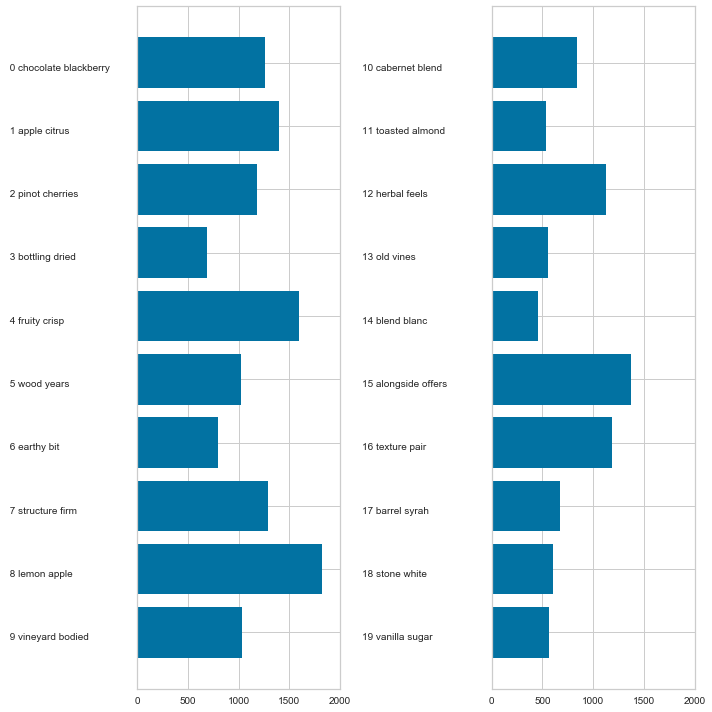

In [23]:
# Let's visualize the result
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# two column bar chart:
for col in [0, 1]: 
    start = col*int(n_topics/2)
    end=(col+1)*int(n_topics/2)
    ax[col].barh(np.arange(int(n_topics/2)), np.sum(document_topics, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(int(n_topics/2))) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    plt.tight_layout()

## 3. Regular Expression

Regular Expression allows us to extract desired pattern from text. In order to use Regular Expression syntax you need to become familiar with some symbols.

<ul>
    <li><b style="color:red">. </b>: Wildcard, matches a single character</li>
    <li><b style="color:red">^ </b>: Indicates start of a string</li>
    <li><b style="color:red"><span>$</span> </b>: Indicates end of a string</li>
    <li><b style="color:red">[ ]</b>: Matches one of the set of characters within [ ]</li>
        <ul>
            <li>[a-z]: Matches one of the characters of a,b,c,...,z</li>
            <li>[^abc]: Matches a character that is not a, b, or c</li>
        </ul>
    <li><b style="color:red">a|b</b>: Matches either a or b, where a and b are string</li>
    <li><b style="color:red">\</b> : Escapes characters for special characters (\t,\n,\b) </li>
    <li><b style="color:red">\b</b> : Matches word boundary </li>
    <li><b style="color:red">\d</b> : Matches any digit, equivalent to [0-9]  </li>
    <li><b style="color:red">\D</b> : Matches any non-digit, equivalent to [^0-9]  </li>
    <li><b style="color:red">\s</b> : Matches any whitespace character, equivalent to [ \t\n\r\f\v]  </li>
    <li><b style="color:red">\S</b> : Matches any non-whitespace character, equivalent to [^ \t\n\r\f\v]  </li>
    <li><b style="color:red">\w</b> : Matches any alphanumeric character, equivalent to [a-zA-Z0-9_]  </li>
    <li><b style="color:red">\w</b> : Matches any non-alphanumeric character, equivalent to [^a-zA-Z0-9_]  </li>
    <li><b style="color:red">*</b> : Matches zero or more occurrences</li>
    <li><b style="color:red">+</b> : Matches one or more occurrences</li>
    <li><b style="color:red">?</b> : Matches zero or one occurrences</li>
    <li><b style="color:red">{n}</b> : Matches exactly n occurrences</li>
    <li><b style="color:red">{n,}</b> : Matches at least n occurrences</li>
    <li><b style="color:red">{,n}</b> : Matches at most n occurrences</li>
    <li><b style="color:red">{m,n}</b> : Matches at least m occurrences and at most n occurrences</li>
</ul>

In [24]:
import re

In [25]:
text = "Hey @MjuL let's have a quick talk with @jZZ. My email is abcd@gmail.com. #talk #regular #expression"

<b>Example:</b> Find words with # in the above sentence 

In [26]:
my_text_list = text.split(' ')
my_text_list

['Hey',
 '@MjuL',
 "let's",
 'have',
 'a',
 'quick',
 'talk',
 'with',
 '@jZZ.',
 'My',
 'email',
 'is',
 'abcd@gmail.com.',
 '#talk',
 '#regular',
 '#expression']

In [27]:
[word for word in my_text_list if re.search('#',word)]

['#talk', '#regular', '#expression']

<b>Example</b>: Find people how mentioned by @ in the above sentence.

In [57]:
# Write your code here
[word for word in my_text_list if re.search('^@\w',word)]

['@MjuL', '@jZZ.']

<b>Example</b>: Find email address @ in the above sentence.

In [77]:
# Write your code here
[word for word in my_text_list if re.findall(r'\w@',word)]  # or if re.search('\w@')

['abcd@gmail.com.']

<b>Note:</b> You can also use <b style="color:blue">findall( )</b> function to find your desired words.

In [70]:
re.findall(r'#\w*',text)

['#talk', '#regular', '#expression']

<b>Question</b>: Why we cannot use the same structure as above to find #?

<b>Example:</b> Let's apply what we have learnt on a Tweets_Brewery dataset. This dataset contains 6-month tweets of Brewery companies in twitter.

In [71]:
df = pd.read_csv("Tweets_Brewery.csv",index_col=0)
df = df.dropna()
df.head()

,text,u_id
0,Have you tried BA mobile yet? http://t.co/QcrU...,15205798.0
1,For the latest BeerAdvocate updates: http://t....,15205798.0
2,"""MillerCoors Seeks Spirits Fans With Bourbon-L...",15205798.0
3,.@CambridgeBrewer Barleywine Fest is this Thur...,15205798.0
4,@roblutter @beernerds Ah. Theres 2 BB threads....,15205798.0


You can use Regular Expression to define patterns of tokens in CountVectorizer. Let's just use # based tokens for analysis.

In [72]:
vect =  CountVectorizer(token_pattern='#\w+')
X = vect.fit_transform(df.text)

Let's visualize the frequency.

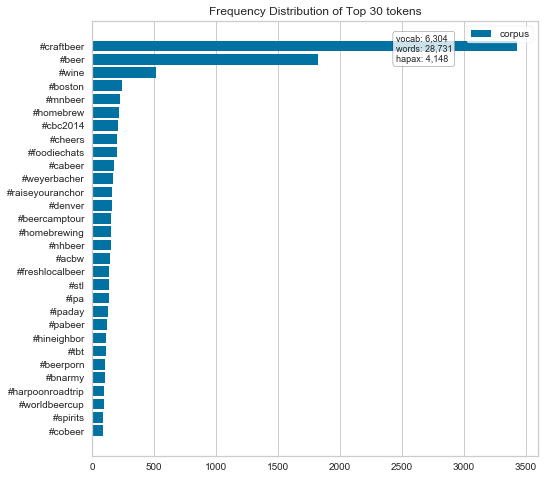

In [82]:
features = vect.get_feature_names()
fig, ax = plt.subplots(figsize=(8, 8))
visualizer = FreqDistVisualizer(features=features, n=30)
visualizer.fit(X)
visualizer.poof()

Let's apply topic mining model.

In [74]:
lda = LatentDirichletAllocation(n_components=5, learning_method="batch",
                                max_iter=25, random_state=0) 
document_topics = lda.fit_transform(X)

In [78]:
n = 5
feature_names = np.array(vect.get_feature_names())
topics = dict()
for idx, component in enumerate(lda.components_): 
    top_n_indices = component.argsort()[:-(n + 1): -1] 
    topic_tokens = [feature_names[i] for i in top_n_indices] 
    topics[idx] = topic_tokens

topics

{0: ['#mnbeer', '#freshlocalbeer', '#stl', '#tbt', '#cobeer'],
 1: ['#beer', '#craftbeer', '#homebrew', '#cheers', '#homebrewing'],
 2: ['#wine', '#foodiechats', '#cabeer', '#weyerbacher', '#raiseyouranchor'],
 3: ['#craftbeer', '#cbc2014', '#denver', '#acbw', '#ipaday'],
 4: ['#boston', '#wine', '#bnarmy', '#harpoonroadtrip', '#spirits']}

Let's find prominent topics

In [79]:
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, learning_method="batch",
                                max_iter=25, random_state=0) 

document_topics = lda.fit_transform(X)
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
topic_names = ["{:>2} ".format(i) + " ".join(words) 
               for i, words in enumerate(feature_names[sorting[:, :2]])] 

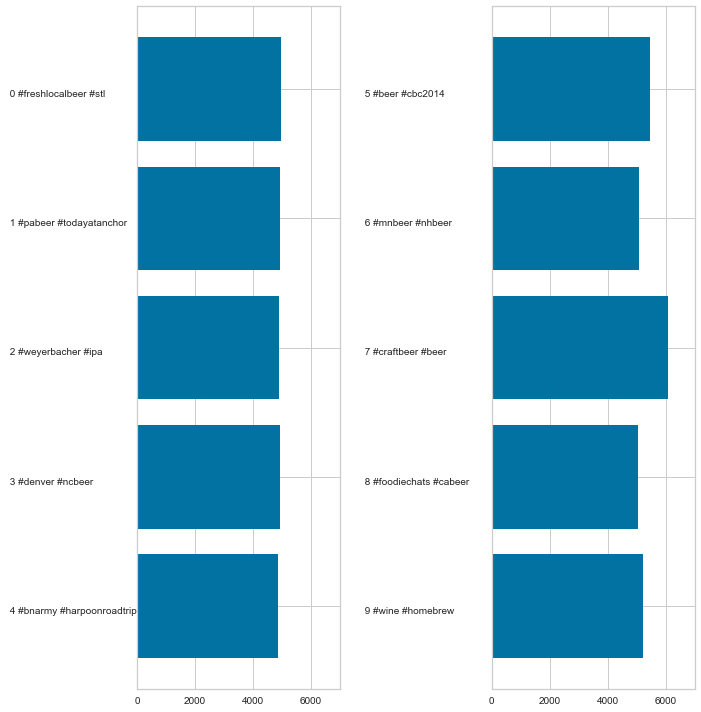

In [80]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
# two column bar chart:
for col in [0, 1]: 
    start = col*int(n_topics/2)
    end=(col+1)*int(n_topics/2)
    ax[col].barh(np.arange(int(n_topics/2)), np.sum(document_topics, axis=0)[start:end]) 
    ax[col].set_yticks(np.arange(int(n_topics/2))) 
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top") 
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 7000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
    plt.tight_layout()

<b>Exercise:</b> Can you extract the links from Tweets using Regular Expression.

<b>Extra Credit Activity:</b> Is there any approach to find the best number of topic with LDA? If yes show that with one example.

In [96]:
df.text[0]

'Have you tried BA mobile yet? http://t.co/QcrUe2DdDH #craftbeer'

In [112]:
[word for word in df.text if re.findall('http\w+',word)]

['Got Chrome? Android? Get a 14-day free trial to BA mag via Google Play: https://t.co/tU11te7IFC #craftbeer',
 'Using Google Chrome? Android? Try a 14 day free trial to BeerAdvocate magazine today. https://t.co/tU11te7IFC #craftbeer',
 'Got Android? Google Chrome? Get a 14 day free trial to BeerAdvocate magazine today. https://t.co/Au3nLjEn7D #craftbeer',
 'Android user? Got Google Chrome? Get a 14-day free trial to BeerAdvocate magazine today! https://t.co/lu9QcjAs3s #craftbeer',
 'American #CraftBeer Week (#ACBW): May 12-18, 2014. How are you celebrating?\nhttp://t.co/DLjFx3HwyJ\n\nhttps://t.co/BrEBJc4zfC',
 'Got Android? Google Chrome? Get a 14-day free trial to BeerAdvocate magazine today! https://t.co/Au3nLjEn7D #craftbeer',
 'Got Android? Chrome? Get a 14-day free trial to BeerAdvocate magazine via Google Play. https://t.co/Au3nLjEn7D',
 'Awesome to see BeerAdvocate magazine still on Google Plays "Top Magazines https://t.co/FKIo392XYD',
 'Hey Android users! Get a 14-day free tri